In [30]:
from __future__ import division, print_function
import os
from shutil import rmtree
import numpy as np
import matplotlib      
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline  
#import soundfile as sf
import librosa
import pyworld as pw

frame_period = 5.0
speed = 1

EPSILON = 1e-8

In [34]:
def savefig(filename, figlist, log=True, xlabel=None, ylabel=None):
    #h = 10
    n = len(figlist)
    # peek into instances
    f = figlist[0]
    if len(f.shape) == 1:
        plt.figure()
        for i, f in enumerate(figlist):
            plt.subplot(n, 1, i+1)
            if len(f.shape) == 1:
                plt.plot(f)
                plt.xlim([0, len(f)])
    elif len(f.shape) == 2:
        Nsmp, dim = figlist[0].shape
        #figsize=(h * float(Nsmp) / dim, len(figlist) * h)
        #plt.figure(figsize=figsize)
        plt.figure()
        for i, f in enumerate(figlist):
            plt.subplot(n, 1, i+1)
            if log:
                x = np.log(f + EPSILON)
            else:
                x = f + EPSILON
            plt.imshow(x.T, origin='lower', interpolation='none', aspect='auto', extent=(0, x.shape[0], 0, x.shape[1]))
    else:
        raise ValueError('Input dimension must < 3.')
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.savefig(filename)

[-9.42220119e-05 -1.76208847e-04 -1.64275300e-04 ... -1.26567239e-03
 -1.38973601e-03  0.00000000e+00]


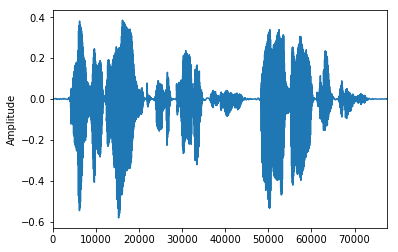

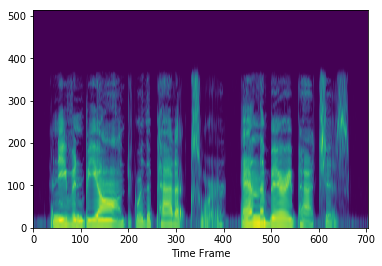

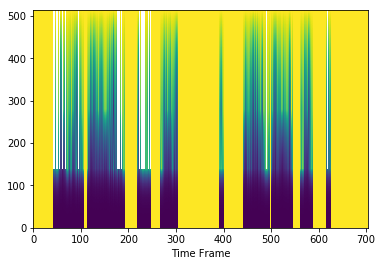

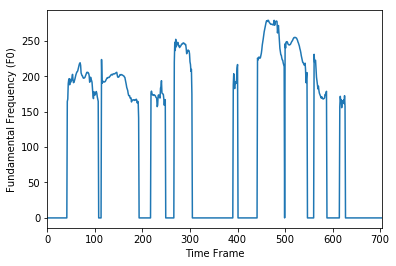

Please check ./output_SF1_100005/ directory for output files


In [41]:
output_directory_base = './output'
input_filename = '../../vcc2016/SF1/100005.wav'

speaker = input_filename.split('/')[-2]
utterance = input_filename.split('/')[-1].split('.')[0]

output_directory = output_directory_base + '_' + speaker + '_' + utterance + '/'

if os.path.isdir(output_directory):
    rmtree(output_directory)
    os.mkdir(output_directory)
else:
    os.mkdir(output_directory)

#x, fs = sf.read('utterance/vaiueo2d.wav')
x, fs = librosa.load(filename, dtype=np.float64)

f0, sp, ap = pw.wav2world(x, fs)    # use default options

print(x)

# Comparison
savefig(output_directory + 'waveform.png', [x], ylabel='Amplitude')
savefig(output_directory + 'spectral.png', [sp], xlabel='Time Frame')
savefig(output_directory +'aperiodicity.png', [ap], log=False, xlabel='Time Frame')
savefig(output_directory + 'f0.png', [f0], xlabel='Time Frame', ylabel='Fundamental Frequency (F0)')

plt.show()

print('Check ' + output_directory + ' directory for output files')